# Project 4: The DFT and the FFT
This project emphasizes the practical aspects of the use of the DFT and FFT in digital signal processing.

## Objective

1. Write a function in Julia that implements a DFT using the definition of the DFT summation formula and verify that it yields the same result as the <code>FFTW</code> package.

2. Create a matrix that can be used to multiply a column vector. We do this because _for_-loops are typically slow in languages like MATLAB or Python, so what is the effect with Julia?
    1. Create a random sequence of length $N=2^{11}$.
    2. Multiply by the DFT matrix.
    3. What is the time comparison to the looped version?

3. Use the <code>fft</code> function to compute the DFT of the same sequence and loop it $10,000$ times before averaging the time result.

4. Repeat the last step for a sequence of length $N=2^{11}-9$. Why does this take longer than $N=2^{11}$ FFT?

5. If the time complexity is proportional to $\mathbb{O}(N\log_{2}(N))$, what is the scale factor A such that the time complexity scales as $\mathbb{O}(AN\log_{2}(N))$ when $n=2^{11}$? 
    1. What is the time prediction for $N=2^{12}$ using the same constant?
    2. Comparing this to the timing results predicted by the formula $\mathbb{O}(AN\log_{2}(N))$, does the time increase grow in proportion to the number of multiplies $\mathbb{O}(N\log_{2}(N))$ as the length $N$ goes from $2^{11}$ to $2^{12}$?

## Solutions:

1. We can construct a naive discrete fourier transform with the use of _for_-loops given the DFT formula 

$$X(k)=\sum_{n=0}^{N-1}x(n)e^{-j 2\pi kn/N}$$

So we import the relevent packages before continuing

In [137]:
using Plots, DSP, FFTW, Random, BenchmarkTools
BenchmarkTools.DEFAULT_PARAMETERS.evals = 10
BenchmarkTools.DEFAULT_PARAMETERS.samples = 10000

10000

In [138]:
function dft(x)
    n = length(x)
    transform = zeros(ComplexF64, (n,1))
    for ii in 0:n-1
        for jj in 0:n-1
            transform[ii+1] = transform[ii+1]+x[jj+1]*exp(-1im*2*pi*jj*ii/n)
        end
    end
    return transform
end

dft (generic function with 1 method)

We define a sequence whose fourier transform is easily verified by eye $$y[n]=\cos(n\pi+\phi)$$

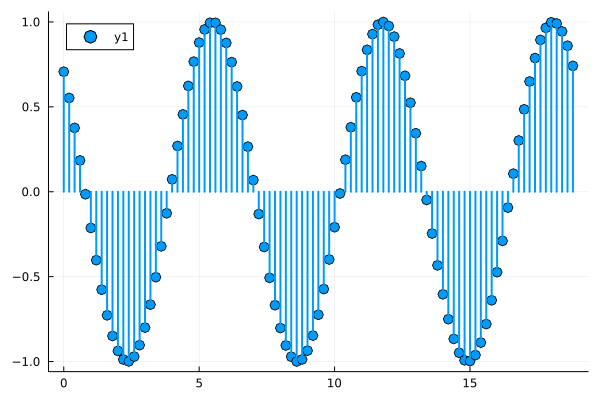

In [139]:
t  = 0:0.2:6*pi
N = length(t)
z = cos.(t.+0.25*pi)

plot(t,z, lines=:stem, marker=:o, markersize=5, linewidth=2)

And evaluate the function with each fourier transform

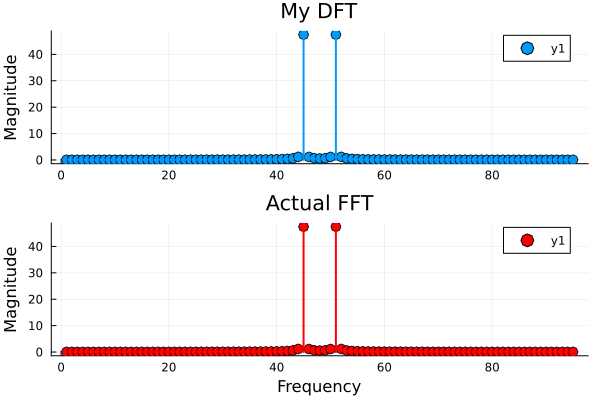

In [140]:
predicted = fftshift(abs.(dft(z)))
actual = fftshift(abs.(fft(z)))

p1 = plot(predicted, title = "My DFT", lines=:stem, marker=:o, markersize=5, linewidth=2)
p2 = plot(actual, title = "Actual FFT", color="red", lines=:stem, marker=:o, markersize=5, linewidth=2)
xaxis!("Frequency")

plot(p1, p2, layout=(2,1))
yaxis!("Magnitude")

The result between the two methods is virtually identical.

2. First, we create a random sequence of length $N=2^{11}$. The function as defined in #1 can be reduced to a single line of code that only considers the length of the sequence. We obtain an $n\times n$ matrix that can be multiplied by a sequence to yield its Fourier transform

In [141]:
rand_seq = rand(Float64, (2^11, 1))

dftmtx(n) = [ cospi(2*i*j/n)-sinpi(2*i*j/n)*im for i=0:n-1, j=0:n-1 ]
F = dftmtx(2^11)

2048×2048 Matrix{ComplexF64}:
 1.0-0.0im       1.0-0.0im         …       1.0-0.0im
 1.0-0.0im  0.999995-0.00306796im     0.999995+0.00306796im
 1.0-0.0im  0.999981-0.00613588im     0.999981+0.00613588im
 1.0-0.0im  0.999958-0.00920375im     0.999958+0.00920375im
 1.0-0.0im  0.999925-0.0122715im      0.999925+0.0122715im
 1.0-0.0im  0.999882-0.0153392im   …  0.999882+0.0153392im
 1.0-0.0im  0.999831-0.0184067im      0.999831+0.0184067im
 1.0-0.0im  0.999769-0.0214741im      0.999769+0.0214741im
 1.0-0.0im  0.999699-0.0245412im      0.999699+0.0245412im
 1.0-0.0im  0.999619-0.0276081im      0.999619+0.0276081im
    ⋮                              ⋱  
 1.0-0.0im  0.999619+0.0276081im      0.999619-0.0276081im
 1.0-0.0im  0.999699+0.0245412im   …  0.999699-0.0245412im
 1.0-0.0im  0.999769+0.0214741im      0.999769-0.0214741im
 1.0-0.0im  0.999831+0.0184067im      0.999831-0.0184067im
 1.0-0.0im  0.999882+0.0153392im      0.999882-0.0153392im
 1.0-0.0im  0.999925+0.0122715im      0.999925-0.

To demonstrate this gives the same result of the looped version of the FFT, we plot the two together

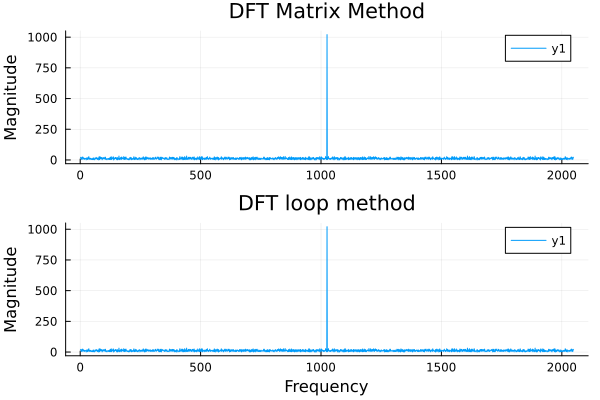

In [142]:
predicted = fftshift(abs.(rand_seq'*F))'
custom = fftshift(abs.(dft(rand_seq)))

p1 = plot(predicted, title = "DFT Matrix Method")
p2 = plot(custom, title = "DFT loop method")
xaxis!("Frequency")

plot(p1, p2, layout=(2,1))
yaxis!("Magnitude")

To compare the elapsed time of both methods, we invoke the <code>@benchmark</code> macro and evaluate the function with a new random sequence

In [143]:
test_sequence = rand(Float64, (2^11, 1))
matrix = dftmtx(2^11)

2048×2048 Matrix{ComplexF64}:
 1.0-0.0im       1.0-0.0im         …       1.0-0.0im
 1.0-0.0im  0.999995-0.00306796im     0.999995+0.00306796im
 1.0-0.0im  0.999981-0.00613588im     0.999981+0.00613588im
 1.0-0.0im  0.999958-0.00920375im     0.999958+0.00920375im
 1.0-0.0im  0.999925-0.0122715im      0.999925+0.0122715im
 1.0-0.0im  0.999882-0.0153392im   …  0.999882+0.0153392im
 1.0-0.0im  0.999831-0.0184067im      0.999831+0.0184067im
 1.0-0.0im  0.999769-0.0214741im      0.999769+0.0214741im
 1.0-0.0im  0.999699-0.0245412im      0.999699+0.0245412im
 1.0-0.0im  0.999619-0.0276081im      0.999619+0.0276081im
    ⋮                              ⋱  
 1.0-0.0im  0.999619+0.0276081im      0.999619-0.0276081im
 1.0-0.0im  0.999699+0.0245412im   …  0.999699-0.0245412im
 1.0-0.0im  0.999769+0.0214741im      0.999769-0.0214741im
 1.0-0.0im  0.999831+0.0184067im      0.999831-0.0184067im
 1.0-0.0im  0.999882+0.0153392im      0.999882-0.0153392im
 1.0-0.0im  0.999925+0.0122715im      0.999925-0.

In [144]:
@benchmark dft(test_sequence)


BenchmarkTools.Trial: 61 samples with 1 evaluation.
 Range (min … max):  81.909 ms …  84.569 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     82.892 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   82.898 ms ± 682.509 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

        ▂█▂      ▂                           ▅  ▅   ▂           
  █▅▅▁▅▅███▅▅▅▁▁▅█▁▅▁▅▅▁▅▅▅▁▁█▅▁▁▁▅█▅▅▅▁▁▅▅▁▅█▁▁█▁▁▅██▁█▁▁▁▅▁▅ ▁
  81.9 ms         Histogram: frequency by time           84 ms <

 Memory estimate: 32.05 KiB, allocs estimate: 2.

In [145]:
@benchmark test_sequence'*matrix

BenchmarkTools.Trial: 1167 samples with 1 evaluation.
 Range (min … max):  4.013 ms …   5.851 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     4.148 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   4.275 ms ± 286.815 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▅▆  ▁█▂                                                      
  ██▆▆███▅▃▂▂▃▄▅▄▃▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▁▁▁▁▁▁▁▂▁▂▁▂▁▂▁▁▁▁▁▁▁ ▂
  4.01 ms         Histogram: frequency by time        5.24 ms <

 Memory estimate: 32.06 KiB, allocs estimate: 3.

It is clear to see that that _for_-loop implementation underperforms compared to the matrix multiplication in Julia. This tracks with similar operations in Python and MATLAB.

3. We can attempt to compare this faster method to the optimized <code>fft</code> function.

In [146]:
@benchmark fft(test_sequence)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  15.400 μs …   7.057 ms  ┊ GC (min … max): 0.00% … 76.26%
 Time  (median):     18.800 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   24.740 μs ± 141.830 μs  ┊ GC (mean ± σ):  9.44% ±  1.64%

   ▃▅▅▇█▇▆▄▃▃▂▁▁        ▂▃▄▄▅▄▄▃▂▂▁▁                           ▂
  ████████████████▇▇██▆█████████████████▇▆▇▅▆▅▆▅▅▄▅▄▅▄▁▅▄▅▆▄▄▅ █
  15.4 μs       Histogram: log(frequency) by time      47.7 μs <

 Memory estimate: 66.08 KiB, allocs estimate: 30.

The <code>fft</code> function is tremendously faster than the DFT matrix method. This is due-in-part to the algorithm developed for the "fast" Fourier Transform.

4. Now we look at the time to evaluate a sequence of size $N=2^{11}-9$

In [147]:
test_sequence = rand(Float64, (2^11-9, 1))
@benchmark fft(test_sequence)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  243.900 μs … 74.739 ms  ┊ GC (min … max): 0.00% … 16.08%
 Time  (median):     278.100 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   317.087 μs ±  1.453 ms  ┊ GC (mean ± σ):  1.05% ±  0.23%

            █▃                                                  
  ▁▃▆▆▆▅▄▂▂▅███▅▅▄▄▃▂▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  244 μs          Histogram: frequency by time          429 μs <

 Memory estimate: 65.83 KiB, allocs estimate: 30.

The time measured for $N=2^{11}-9$ is clearly longer than the time reported for $N=2^{11}$ even though the size of the array is shorter by 9 indices. Because this is a non-power-of-two operation, the conventional method associated with PoT operations can not be exploited. This is still faster than a direct DFT, so what might happen behind the scenes is that the DFT for the nearest PoT is calculated and put into a circular convolution scheme with the array size being truncated at the end. This would involve additional steps compared to the $N = 2^{ν}$ operation thus costing more time.

5. We predict the time it would take to perform a similar operation with $N=2^{12}$ by first finding the value of $A$ for $N=2^{11}$ theoretically and comparing to the calculated value in the code:

$$
\begin{aligned}
T &=& AN\log_{2}(N)\\
A &=& \frac{T}{N\log_{2}(N)}
\end{aligned}
$$

In [150]:
mean_time = 24.7e-6
A_calc = mean_time/(2^11*log2(2^11))
t_predicted = A_calc*2^12*log2(2^12)

5.389090909090909e-5

It is expected to take $53.9\mu s$ to perform a calculation for $N=2^{12}$, so we can check this by creating a sequence of that length and benchmarking the <code>fft</code> function before expressing the percent difference.

In [151]:
test_sequence = rand(Float64, (2^12, 1))
@benchmark fft(test_sequence)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  33.500 μs …  11.193 ms  ┊ GC (min … max):  0.00% … 92.22%
 Time  (median):     41.900 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   53.657 μs ± 233.527 μs  ┊ GC (mean ± σ):  12.45% ±  2.89%

        ▃█▆▁                                                    
  ▁▂▃▄▅▇████▄▂▂▁▁▁▁▁▁▂▂▂▃▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  33.5 μs         Histogram: frequency by time         95.4 μs <

 Memory estimate: 130.08 KiB, allocs estimate: 30.

With a mean time of $53.657\mu s$ the predicted is off by $0.45\%$.